<a href="https://colab.research.google.com/github/sharifbubuka/uni-bremen-edge-computing-course/blob/main/tiny_ml_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TINY ML ASSIGNMENT 1

## CONFIGURATIONS

In [19]:
# Define paths to model files
import os
MODELS_DIR = 'models/'

if not os.path.exists(MODELS_DIR):
  os.mkdir(MODELS_DIR)

MODELS_TF = [MODELS_DIR + 'model-1', MODELS_DIR + 'model-2', MODELS_DIR + 'model-3', MODELS_DIR + 'model-4', MODELS_DIR + 'model-5', MODELS_DIR + 'model-6']
MODELS_TFLITE = [MODELS_DIR + 'model-1.tflite', MODELS_DIR + 'model-2.tflite', MODELS_DIR + 'model-3.tflite', MODELS_DIR + 'model-4.tflite', MODELS_DIR + 'model-5.tflite', MODELS_DIR + 'model-6.tflite']

In [4]:
# Install dependencies
! pip install tensorflow

In [20]:
# Import dependencies
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

## DATA SETUP

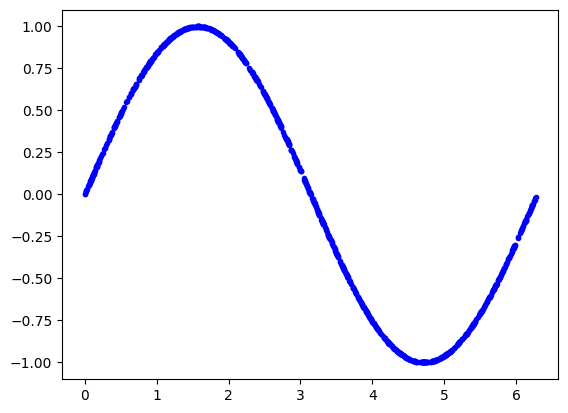

In [21]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

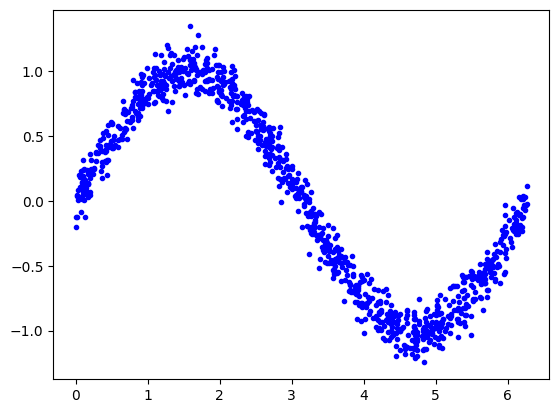

In [22]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

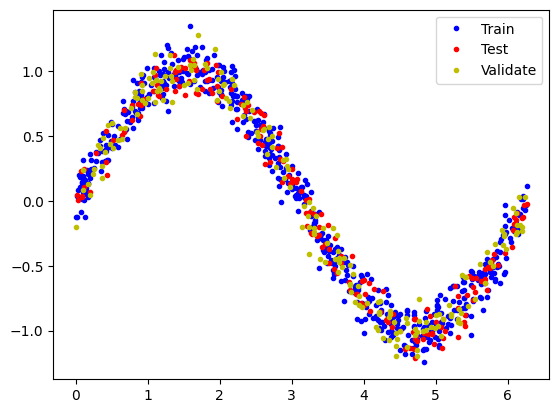

In [23]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


## MODEL DESIGNS

In [24]:
# model design configurations

models = []

model_configurations = [[16, 1], [16, 2], [16, 4], [32, 1], [32, 2], [32, 4]]

# function to create model, given number of nodes and layers
def create_model(num_nodes, num_layers):
  model = tf.keras.Sequential()

   # First layer with specified number of nodes
  model.add(keras.layers.Dense(num_nodes, activation='relu', input_shape=(1,)))

  # Adding hidden layers based on the num_layers
  for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_nodes, activation='relu'))

  # Final output layer
  model.add(keras.layers.Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss="mse", metrics=["mae"])

  return model


In [25]:
# Deisgn the models
for config in model_configurations:
    num_nodes, num_layers = config
    model = create_model(num_nodes, num_layers)
    models.append(model)

In [26]:
for i, model in enumerate(models):
    print(f"Model {i+1} summary:")
    model.summary()
    print("\n")

Model 1 summary:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                32        
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 2 summary:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 16)                32        
                                                                 
 dense_23 (Dense)            (None, 16)                272       
                          

## MODEL TRAINING

In [27]:
# Model training configurations

# Training Paramters
epochs = 500
batch_size = 64
validation_data=(x_validate, y_validate)

In [28]:
# Model training

histories = [model.fit(x_train, y_train, epochs, batch_size, validation_data) for model in models]

Epoch 1/64
Epoch 2/64
Epoch 3/64
Epoch 4/64
Epoch 5/64
Epoch 6/64
Epoch 7/64
Epoch 8/64
Epoch 9/64
Epoch 10/64
Epoch 11/64
Epoch 12/64
Epoch 13/64
Epoch 14/64
Epoch 15/64
Epoch 16/64
Epoch 17/64
Epoch 18/64
Epoch 19/64
Epoch 20/64
Epoch 21/64
Epoch 22/64
Epoch 23/64
Epoch 24/64
Epoch 25/64
Epoch 26/64
Epoch 27/64
Epoch 28/64
Epoch 29/64
Epoch 30/64
Epoch 31/64
Epoch 32/64
Epoch 33/64
Epoch 34/64
Epoch 35/64
Epoch 36/64
Epoch 37/64
Epoch 38/64
Epoch 39/64
Epoch 40/64
Epoch 41/64
Epoch 42/64
Epoch 43/64
Epoch 44/64
Epoch 45/64
Epoch 46/64
Epoch 47/64
Epoch 48/64
Epoch 49/64
Epoch 50/64
Epoch 51/64
Epoch 52/64
Epoch 53/64
Epoch 54/64
Epoch 55/64
Epoch 56/64
Epoch 57/64
Epoch 58/64
Epoch 59/64
Epoch 60/64
Epoch 61/64
Epoch 62/64
Epoch 63/64
Epoch 64/64
Epoch 1/64
Epoch 2/64
Epoch 3/64
Epoch 4/64
Epoch 5/64
Epoch 6/64
Epoch 7/64
Epoch 8/64
Epoch 9/64
Epoch 10/64
Epoch 11/64
Epoch 12/64
Epoch 13/64
Epoch 14/64
Epoch 15/64
Epoch 16/64
Epoch 17/64
Epoch 18/64
Epoch 19/64
Epoch 20/64
Epoch 21/6

In [29]:
# Save models
for index, model in enumerate(models):
  model.save(MODELS_DIR + f'model-{index + 1}')

## METRIC ANALYSIS

## LITE MODEL QUANTIZATION

In [32]:
# Convert each model to the TensorFlow Lite format with quantization
def representative_dataset():
    for i in range(500):
        yield([x_train[i].reshape(1, 1)])

for index, model in enumerate(models):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    # Set the optimization flag
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce integer only quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    # Provide a representative dataset to ensure we quantize correctly
    converter.representative_dataset = representative_dataset
    model_tflite = converter.convert()

    dir_path = f'models/model-{index + 1}'

    # Save the model to disk
    with open(os.path.join(dir_path, f'model-{index + 1}.tflite'), "wb") as f:
        f.write(model_tflite)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist